In [1]:

import time
import pulp as p 
def min_max_lp_all(data1,gamma,eps,r):
    
    m=data1.shape[0]
    n=data1.shape[1]
    print('dimension of data')
    print(m,n)
    Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
   
    
    X=np.zeros(n+1,dtype=p.LpVariable)
    sizes=np.zeros(m,dtype=int)
    for i in range(m):
        count=0
        for j in range(n):
            if data1[i][j]==1:
                count=count+1
                
        sizes[i]=count
  

    for i in range(n):
        var1=str(i)
        
        X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
       
        
    X[n] =  p.LpVariable("z1",lowBound=0)


    #########objective function#####################
    Lp_prob += X[n]


    ##############constraint#################
    for i in range(2*m):
        if i<m:
            Lp_prob += X[n] >= p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)])
            Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) >= (2*gamma-1)*sizes[i]
            Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) <= ((2*gamma-1)+eps)*sizes[i]
            
        else:        
            Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1[i-m][j] for j in range(n)])
            
         
 
    #n is the number of elements in sensitive attribute 
           
       
    Lp_prob += X[n] <= 42000
    
    #####################################
    status = Lp_prob.solve()   # Solver 
    print(p.LpStatus[status]) 
    print("discripency is:")        
    print(p.value(Lp_prob.objective))
    x=np.zeros(n,dtype=float)

   # The solution status 
    Synth1={}
    Synth2={}
    # # Printing the final solution 
    for i in range(n):
        if(p.value(X[i])==1):
            Synth1[i]=1 
            Synth2[i]=-1
        else:
            Synth1[i]=-1
            Synth2[i]=1
    Synthu1=Synth1  
    Synthu2=Synth2  
    
              
    return Synthu1,Synthu2   


In [2]:

from random import *
import time
import pandas as pd
import numpy as np
filename1 = '../input/x_control_train110k.csv'
filename2 = '../input/x_control_train210k.csv'
filename3 = '../input/y_all_train10k.csv'
filename4 = '../input/y_train_svm10k.csv'
d1 = pd.read_csv(filename1,header=None)
d2 = pd.read_csv(filename2,header=None)
d3 = pd.read_csv(filename3,header=None)
d4 = pd.read_csv(filename4,header=None)


n=d1.shape[0]



        
r = np.zeros(n, dtype = int)         
for i in range(n):
    if int(d3.iloc[i,0])==-1 :
        r[i]=-1
    else :
        r[i]= 1    
        
data = np.zeros((7, n), dtype = int)

a=0
b=0
c=0
d=0
e=0
f=0
g=0
acc1=0
acc2=0
acc3=0
acc4=0
acc5=0
acc6=0
acc7=0

for i in range(n):
    if int(d1.iloc[i,0])==4:
            data[0][i]= 1
            a=a+1
            if r[i]==1:
                acc1=acc1+1
    elif int(d1.iloc[i,0])==3:
            data[1][i]= 1
            b=b+1
            if r[i]==1:
                acc2=acc2+1
    elif int(d1.iloc[i,0]) == 2:
            data[2][i]= 1
            c=c+1
            if r[i]==1:
                acc3=acc3+1
    elif int(d1.iloc[i,0]) == 1:
            data[3][i]= 1
            d=d+1
            if r[i]==1:
                acc4=acc4+1
    elif int(d1.iloc[i,0]) == 0:
            data[4][i]= 1
            e=e+1
            if r[i]==1:
                acc5=acc5+1

    if int(d2.iloc[i,0]) == 1:
            data[5][i]= 1
            f=f+1
            if r[i]==1:
                acc6=acc6+1
    elif int(d2.iloc[i,0])==0:
            data[6][i]= 1
            g=g+1
            if r[i]==1:
                acc7=acc7+1                
            
print(a,b,c,d,e,f,g)              
print(acc1,acc2,acc3,acc4,acc5,acc6,acc7)
a1=float(acc1/a)
b1=float(acc2/b)
c1=float(acc3/c)
d1=float(acc4/d)
e1=float(acc5/e)
f1=float(acc6/f)
g1=float(acc7/g)

print(a1,b1,c1,d1,e1,f1,g1)





###########################################

maxi=0
acc1_l=[]
acc2_l=[]
epsilon_l=[]

feld_di_arr1=[]
zafar_di_arr1=[]
   
feld_di_arr2=[]
zafar_di_arr2=[]  


# for gamma in np.arange(0.15,0.5,.05):
#     for eps in np.arange(0.05,0.02,-.01): 
gamma=0.25
eps=0.05
for gamma in np.arange(.16,.28,0.01):
    acc1=0
    acc2=0
    acc3=0
    acc4=0
    acc5=0
    acc6=0
    acc7=0

    start_time = time.time()
    u1,u2=min_max_lp_all(data,gamma,eps,r)
    print("--- %s seconds ---" % (time.time() - start_time))
    #######################Disp_impact#######################  



    for i in range(n):
            if data[0][i]== 1 and u1[i]==1:
                    acc1=acc1+1
            elif data[1][i]== 1 and u1[i]==1:
                    acc2=acc2+1  
            elif data[2][i]== 1 and u1[i]==1:
                    acc3=acc3+1 
            elif data[3][i]== 1 and u1[i]==1:
                    acc4=acc4+1         
            elif data[4][i]== 1 and u1[i]==1:
                    acc5=acc5+1 
            if data[5][i]== 1 and u1[i]==1:
                    acc6=acc6+1
            elif data[6][i]== 1 and u1[i]==1:
                    acc7=acc7+1        


    a1=float(acc1/a)
    b1=float(acc2/b)
    c1=float(acc3/c)
    d1=float(acc4/d)
    e1=float(acc5/e)
    f1=float(acc6/f)
    g1=float(acc7/g)
    print(acc1,acc2,acc3,acc4,acc5,acc5,acc7)
    print(a1,b1,c1,d1,e1,f1,g1)

  

    count1=0
    count2=0
    for j in range(r.shape[0]):
            if(r[j]==u1[j]):
                count1+=1
    acc1=float(count1/r.shape[0])        

    for j in range(r.shape[0]):
            if(r[j]==u2[j]):
                count2+=1
    acc2=float(count2/r.shape[0]) 
    print(acc1)
    print(acc2)
    print(gamma)
    print(eps)
    
    acc2_l.append(acc2)
    acc1_l.append(acc1)


    print("Accuracy::")    
    print(acc1_l)     
    print(acc2_l)

    ###########################
    a_acc=0
    b_acc=0

    fi= np.zeros(n) 
    count=0
    acc=0
    ci=[]
    for alpha in np.arange(0,1.05,0.05):
        f_acc=0
        acc1=0
        acc2=0
        acc3=0
        acc4=0
        acc5=0
        acc6=0
        acc7=0
        for i in range(n):

            z=random()
            if z < alpha:
                    fi[i]= u1[i] 
                    count=count+1
            else:
                   fi[i]= int(d4.iloc[i,0])

        for i in range(n):
             if fi[i] == int(d3.iloc[i,0]):
                    f_acc=f_acc+1


        f_acc_percent=f_acc/n  
        ci.append(f_acc_percent)

        for i in range(n):
            if data[0][i]== 1 and fi[i]==1:
                    acc1=acc1+1
            elif data[1][i]== 1 and fi[i]==1:
                    acc2=acc2+1  
            elif data[2][i]== 1 and fi[i]==1:
                    acc3=acc3+1 
            elif data[3][i]== 1 and fi[i]==1:
                    acc4=acc4+1         
            elif data[4][i]== 1 and fi[i]==1:
                    acc5=acc5+1 
            if data[5][i]== 1 and fi[i]==1:
                    acc6=acc6+1
            elif data[6][i]== 1 and fi[i]==1:
                    acc7=acc7+1        


        a1=float(acc1/a)
        b1=float(acc2/b)
        c1=float(acc3/c)
        d1=float(acc4/d)
        e1=float(acc5/e)
        f1=float(acc6/f)
        g1=float(acc7/g)
        print(acc1,acc2,acc3,acc4,acc5,acc6,acc7)
        print(a1,b1,c1,d1,e1,f1,g1)


    print(ci)



6022 57 665 193 63 4699 2301
1532 4 99 57 9 1437 264
0.25440053138492197 0.07017543859649122 0.14887218045112782 0.29533678756476683 0.14285714285714285 0.30580974675462863 0.11473272490221642
dimension of data
7 7000
Optimal
discripency is:
3794.0
--- 9.890689373016357 seconds ---
1114 10 107 34 11 11 407
0.18498837595483228 0.17543859649122806 0.16090225563909774 0.17616580310880828 0.1746031746031746 0.1849329644605235 0.17687961755758366
0.669
0.331
0.16
0.05
Accuracy::
[0.669]
[0.331]
1277 4 74 49 7 1209 202
0.21205579541680505 0.07017543859649122 0.11127819548872181 0.2538860103626943 0.1111111111111111 0.25728878484783996 0.08778791829639288
1277 4 75 48 7 1194 217
0.21205579541680505 0.07017543859649122 0.11278195488721804 0.24870466321243523 0.1111111111111111 0.2540966163013407 0.09430682312038244
1242 5 74 45 9 1162 213
0.20624377283294587 0.08771929824561403 0.11127819548872181 0.23316062176165803 0.14285714285714285 0.24728665673547565 0.09256844850065189
1256 5 79 48 8 11

Optimal
discripency is:
3554.0
--- 9.456937313079834 seconds ---
1234 11 120 35 12 12 449
0.20491531052806378 0.19298245614035087 0.18045112781954886 0.18134715025906736 0.19047619047619047 0.2049372206852522 0.19513255106475447
0.6578571428571428
0.34214285714285714
0.18000000000000002
0.05
Accuracy::
[0.669, 0.6617142857142857, 0.6578571428571428]
[0.331, 0.3382857142857143, 0.34214285714285714]
1277 4 74 49 7 1209 202
0.21205579541680505 0.07017543859649122 0.11127819548872181 0.2538860103626943 0.1111111111111111 0.25728878484783996 0.08778791829639288
1269 4 75 50 6 1190 214
0.21072733311192296 0.07017543859649122 0.11278195488721804 0.25906735751295334 0.09523809523809523 0.2532453713556076 0.09300304215558453
1285 4 73 46 6 1182 232
0.21338425772168715 0.07017543859649122 0.10977443609022557 0.23834196891191708 0.09523809523809523 0.25154288146414133 0.10082572794437202
1258 4 77 45 6 1149 241
0.20890069744271006 0.07017543859649122 0.11578947368421053 0.23316062176165803 0.0952

Optimal
discripency is:
3314.0
--- 8.000059127807617 seconds ---
1354 12 133 43 13 13 517
0.22484224510129525 0.21052631578947367 0.2 0.22279792746113988 0.20634920634920634 0.22089806341774845 0.22468491960017384
0.6465714285714286
0.3534285714285714
0.20000000000000004
0.05
Accuracy::
[0.669, 0.6617142857142857, 0.6578571428571428, 0.6521428571428571, 0.6465714285714286]
[0.331, 0.3382857142857143, 0.34214285714285714, 0.34785714285714286, 0.3534285714285714]
1277 4 74 49 7 1209 202
0.21205579541680505 0.07017543859649122 0.11127819548872181 0.2538860103626943 0.1111111111111111 0.25728878484783996 0.08778791829639288
1298 5 77 50 5 1207 228
0.21554300896712056 0.08771929824561403 0.11578947368421053 0.25906735751295334 0.07936507936507936 0.2568631623749734 0.09908735332464146
1296 4 80 49 8 1210 227
0.21521089339090002 0.07017543859649122 0.12030075187969924 0.2538860103626943 0.12698412698412698 0.25750159608427325 0.09865275966970882
1277 6 75 43 10 1152 259
0.21205579541680505 0

Optimal
discripency is:
3072.0
--- 11.145259857177734 seconds ---
1475 13 147 43 14 14 541
0.24493523746263698 0.22807017543859648 0.22105263157894736 0.22279792746113988 0.2222222222222222 0.24494573313470952 0.23511516731855714
0.6367142857142857
0.36328571428571427
0.22000000000000006
0.05
Accuracy::
[0.669, 0.6617142857142857, 0.6578571428571428, 0.6521428571428571, 0.6465714285714286, 0.6418571428571429, 0.6367142857142857]
[0.331, 0.3382857142857143, 0.34214285714285714, 0.34785714285714286, 0.3534285714285714, 0.35814285714285715, 0.36328571428571427]
1277 4 74 49 7 1209 202
0.21205579541680505 0.07017543859649122 0.11127819548872181 0.2538860103626943 0.1111111111111111 0.25728878484783996 0.08778791829639288
1300 4 77 51 7 1208 231
0.2158751245433411 0.07017543859649122 0.11578947368421053 0.26424870466321243 0.1111111111111111 0.25707597361140666 0.10039113428943937
1301 3 80 50 7 1215 226
0.21604118233145134 0.05263157894736842 0.12030075187969924 0.25906735751295334 0.11111

Optimal
discripency is:
2832.0
--- 10.06992793083191 seconds ---
1595 15 160 51 16 16 609
0.2648621720358685 0.2631578947368421 0.24060150375939848 0.26424870466321243 0.25396825396825395 0.2613321983400724 0.2646675358539765
0.6265714285714286
0.37342857142857144
0.24000000000000007
0.05
Accuracy::
[0.669, 0.6617142857142857, 0.6578571428571428, 0.6521428571428571, 0.6465714285714286, 0.6418571428571429, 0.6367142857142857, 0.6331428571428571, 0.6265714285714286]
[0.331, 0.3382857142857143, 0.34214285714285714, 0.34785714285714286, 0.3534285714285714, 0.35814285714285715, 0.36328571428571427, 0.3668571428571429, 0.37342857142857144]
1277 4 74 49 7 1209 202
0.21205579541680505 0.07017543859649122 0.11127819548872181 0.2538860103626943 0.1111111111111111 0.25728878484783996 0.08778791829639288
1286 4 78 47 7 1208 214
0.21355031550979742 0.07017543859649122 0.11729323308270677 0.24352331606217617 0.1111111111111111 0.25707597361140666 0.09300304215558453
1327 6 81 53 8 1243 232
0.2203586

1638 14 164 51 15 1284 598
0.2720026569246098 0.24561403508771928 0.24661654135338346 0.26424870466321243 0.23809523809523808 0.2732496275803362 0.2598870056497175
1656 15 167 52 16 1292 614
0.2749916971105945 0.2631578947368421 0.2511278195488722 0.2694300518134715 0.25396825396825395 0.27495211747180254 0.26684050412863974
[0.852, 0.8401428571428572, 0.8294285714285714, 0.819, 0.8094285714285714, 0.7928571428571428, 0.7812857142857143, 0.7684285714285715, 0.7562857142857143, 0.7514285714285714, 0.739, 0.7235714285714285, 0.714, 0.7051428571428572, 0.6868571428571428, 0.6801428571428572, 0.6652857142857143, 0.6558571428571428, 0.6425714285714286, 0.6341428571428571, 0.6204285714285714]
dimension of data
7 7000
Optimal
discripency is:
2590.0
--- 7.392839193344116 seconds ---
1716 16 173 55 17 17 638
0.28495516439721025 0.2807017543859649 0.26015037593984963 0.2849740932642487 0.2698412698412698 0.2849542455841668 0.27727075184702304
0.6134285714285714
0.38657142857142857
0.260000000000

1600 9 153 51 16 1291 538
0.2656924609764198 0.15789473684210525 0.23007518796992482 0.26424870466321243 0.25396825396825395 0.27473930623536924 0.23381138635375923
1671 16 153 52 19 1337 574
0.2774825639322484 0.2807017543859649 0.23007518796992482 0.2694300518134715 0.30158730158730157 0.2845286231113003 0.2494567579313342
1684 15 166 48 13 1329 597
0.2796413151776818 0.2631578947368421 0.24962406015037594 0.24870466321243523 0.20634920634920634 0.282826133219834 0.25945241199478486
1711 13 159 53 19 1343 612
0.28412487545665893 0.22807017543859648 0.23909774436090225 0.27461139896373055 0.30158730158730157 0.28580549052989995 0.26597131681877445
1738 16 176 56 18 1370 634
0.288608435735636 0.2807017543859649 0.2646616541353383 0.29015544041450775 0.2857142857142857 0.29155139391359863 0.27553237722729246
1759 16 174 58 17 1365 659
0.2920956492859515 0.2807017543859649 0.26165413533834586 0.3005181347150259 0.2698412698412698 0.2904873377314322 0.2863972186006084
1776 16 180 56 18 13

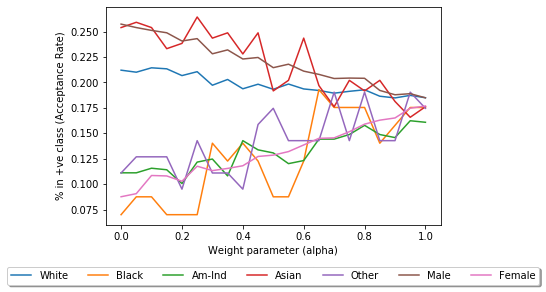

In [3]:
#beta =0.16>
import matplotlib.pyplot as plt
import numpy as np
x=[[0.21205579541680505 ,0.07017543859649122 ,0.11127819548872181 ,0.2538860103626943 ,0.1111111111111111 ,0.25728878484783996 ,0.08778791829639288],

[0.2100631019594819 ,0.08771929824561403 ,0.11127819548872181 ,0.25906735751295334 ,0.12698412698412698 ,0.25388380506490743 ,0.09083007388092133],

[0.21438060445034873 ,0.08771929824561403 ,0.11578947368421053 ,0.2538860103626943 ,0.12698412698412698 ,0.25111725899127474 ,0.10864841373315949],
[0.21338425772168715 ,0.07017543859649122 ,0.11428571428571428 ,0.23316062176165803 ,0.12698412698412698 ,0.2487763353905086 ,0.10821382007822686],

[0.20674194619727665 ,0.07017543859649122 ,0.10075187969924812 ,0.23834196891191708 ,0.09523809523809523 ,0.24068950840604383 ,0.10299869621903521],

[0.2105612753238127 ,0.07017543859649122 ,0.12180451127819548 ,0.26424870466321243 ,0.14285714285714285 ,0.24303043200680996 ,0.11777488048674489],

[0.1972766522749917 ,0.14035087719298245 ,0.12481203007518797 ,0.24352331606217617 ,0.1111111111111111 ,0.2281336454564801 ,0.11342894393741851],

[0.2029226170707406 ,0.12280701754385964 ,0.10827067669172932 ,0.24870466321243523 ,0.1111111111111111 ,0.23196424771227922 ,0.1156019122120817],

[0.1937894387246762 ,0.14035087719298245 ,0.14285714285714285 ,0.22797927461139897 ,0.09523809523809523 ,0.22302617578208128 ,0.11820947414167753],

[0.19827299900365328 ,0.12280701754385964 ,0.13383458646616542 ,0.24870466321243523 ,0.15873015873015872 ,0.22451585443711428 ,0.12733594089526293],

[0.1932912653603454 ,0.08771929824561403 ,0.13082706766917293 ,0.19170984455958548 ,0.1746031746031746 ,0.21451372632474994 ,0.12863972186006084],

[0.19843905679176355 ,0.08771929824561403 ,0.12030075187969924 ,0.20207253886010362 ,0.14285714285714285 ,0.2179187061076825 ,0.13211647109952196],

[0.19362338093656592 ,0.12280701754385964 ,0.12330827067669173 ,0.24352331606217617 ,0.14285714285714285 ,0.2111087465418174 ,0.13863537592351152],

[0.19212886084357356 ,0.19298245614035087 ,0.1443609022556391 ,0.19689119170984457 ,0.14285714285714285 ,0.20791657799531815 ,0.14515428074750109],

[0.18947193623380937 ,0.17543859649122806 ,0.1443609022556391 ,0.17616580310880828 ,0.19047619047619047 ,0.20387316450308576 ,0.14558887440243373],

[0.19129857190302224 ,0.17543859649122806 ,0.14887218045112782 ,0.20207253886010362 ,0.14285714285714285 ,0.20429878697595233 ,0.15167318557149065],
[0.1927930919960146 ,0.17543859649122806 ,0.15789473684210525 ,0.19170984455958548 ,0.19047619047619047 ,0.20408597573951906 ,0.1590612777053455],

[0.18648289604782464 ,0.14035087719298245 ,0.14887218045112782 ,0.20207253886010362 ,0.14285714285714285 ,0.19216854649925516 ,0.16297262059973924],

[0.184822318166722 ,0.15789473684210525 ,0.14586466165413534 ,0.18134715025906736 ,0.14285714285714285 ,0.18791232177058947 ,0.16514558887440242],

[0.18731318498837596 ,0.17543859649122806 ,0.162406015037594 ,0.16580310880829016 ,0.19047619047619047 ,0.1889763779527559 ,0.17470664928292046],

[0.18498837595483228 ,0.17543859649122806 ,0.16090225563909774 ,0.17616580310880828 ,0.1746031746031746 ,0.1849329644605235 ,0.17687961755758366],

[0.18498837595483228 ,0.17543859649122806 ,0.16090225563909774 ,0.17616580310880828 ,0.1746031746031746 ,0.1849329644605235 ,0.17687961755758366]]

a=[x[i][0] for i in range(21)]   
b=[x[i][1] for i in range(21)] 
c=[x[i][2] for i in range(21)]   
d=[x[i][3] for i in range(21)] 
e=[x[i][4] for i in range(21)]   
f=[x[i][5] for i in range(21)] 
g=[x[i][6] for i in range(21)]  
 


Discrepancy=np.arange(0,1.05,0.05)  
 
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(Discrepancy,a,label='White')   
ax.plot(Discrepancy,b,label='Black')  
ax.plot(Discrepancy,c,label='Am-Ind')  
ax.plot(Discrepancy,d,label='Asian')  
ax.plot(Discrepancy,e,label='Other')   
ax.plot(Discrepancy,f,label='Male')  
ax.plot(Discrepancy,g,label='Female') 



   
plt.title('')
ax.set_xlabel('Weight parameter (alpha)')
ax.set_ylabel('% in +ve class (Acceptance Rate)') 
 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 



plt.show()


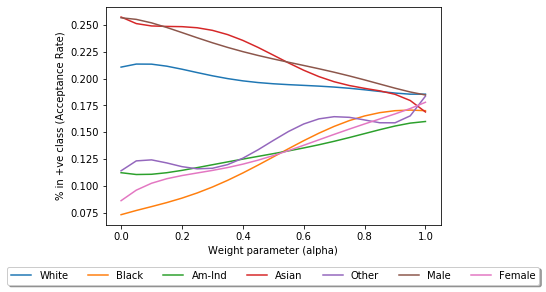

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.

y1=savgol_filter(a, 21, 5)
y2=savgol_filter(b, 21, 5)
y3=savgol_filter(c, 21, 5)
y4=savgol_filter(d, 21, 5)
y5=savgol_filter(e, 21, 5)
y6=savgol_filter(f, 21, 5)
y7=savgol_filter(g, 21, 5)


fig = plt.figure()
ax = plt.subplot(111)
ax.plot(Discrepancy,y1,label='White')   
ax.plot(Discrepancy,y2,label='Black')  
ax.plot(Discrepancy,y3,label='Am-Ind')  
ax.plot(Discrepancy,y4,label='Asian')  
ax.plot(Discrepancy,y5,label='Other')   
ax.plot(Discrepancy,y6,label='Male')  
ax.plot(Discrepancy,y7,label='Female') 



   
plt.title('')
ax.set_xlabel('Weight parameter (alpha)')
ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 



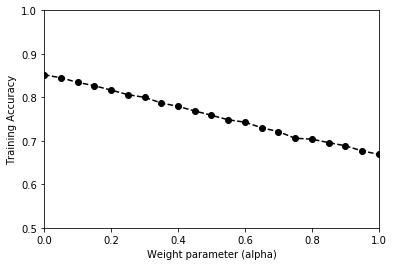

In [5]:
import matplotlib.pyplot as plt
import numpy as np

acc=[0.852, 0.845, 0.8344285714285714, 0.8267142857142857, 0.8167142857142857, 0.8062857142857143, 0.8, 0.787, 0.7792857142857142, 0.7687142857142857, 0.7587142857142857, 0.7484285714285714, 0.7428571428571429, 0.73, 0.7211428571428572, 0.706, 0.7037142857142857, 0.6958571428571428, 0.6885714285714286, 0.6767142857142857, 0.669]
DI=np.arange(0,1.05,0.05)

plt.axis([0, 1, 0.5, 1])
plt.xlabel('Weight parameter (alpha)')
plt.ylabel('Training Accuracy')

plt.title('')
 
plt.plot(DI,acc,color='black', linestyle='dashed', marker='.',
     markerfacecolor='black', markersize=12)   


plt.show() 


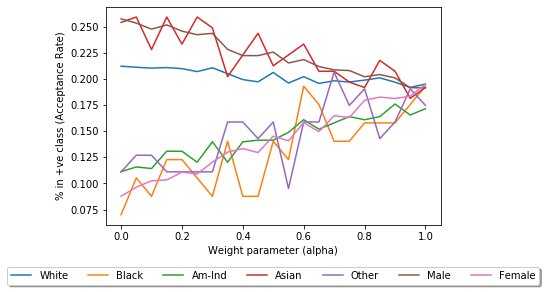

In [6]:
#beta>17
import matplotlib.pyplot as plt
import numpy as np
x=[[0.21205579541680505 ,0.07017543859649122 ,0.11127819548872181 ,0.2538860103626943 ,0.1111111111111111 ,0.25728878484783996 ,0.08778791829639288],

[0.21105944868814347 ,0.10526315789473684 ,0.11578947368421053 ,0.25906735751295334 ,0.12698412698412698 ,0.2532453713556076 ,0.09647979139504563],
[0.21022915974759215 ,0.08771929824561403 ,0.11428571428571428 ,0.22797927461139897 ,0.12698412698412698 ,0.24749946797190892 ,0.10256410256410256],
[0.21072733311192296 ,0.12280701754385964 ,0.13082706766917293 ,0.25906735751295334 ,0.1111111111111111 ,0.25154288146414133 ,0.10343328987396784
],

[0.20973098638326138 ,0.12280701754385964 ,0.13082706766917293 ,0.23316062176165803 ,0.1111111111111111 ,0.24558416684400936 ,0.11082138200782268
],
[0.20690800398538692 ,0.10526315789473684 ,0.12030075187969924 ,0.25906735751295334 ,0.1111111111111111 ,0.24217918706107683 ,0.10908300738809214
],
[0.2105612753238127 ,0.08771929824561403 ,0.13984962406015036 ,0.24870466321243523 ,0.1111111111111111 ,0.24345605447967653 ,0.12038244241634072
],
[0.20491531052806378 ,0.14035087719298245 ,0.12030075187969924 ,0.20207253886010362 ,0.15873015873015872 ,0.2281336454564801 ,0.12994350282485875
],
[0.19926934573231483 ,0.08771929824561403 ,0.13984962406015036 ,0.22279792746113988 ,0.15873015873015872 ,0.22217493083634815 ,0.13342025206431987
],
[0.19711059448688142 ,0.08771929824561403 ,0.14135338345864662 ,0.24352331606217617 ,0.14285714285714285 ,0.22217493083634815 ,0.1295089091699261
],
[0.2060777150448356 ,0.14035087719298245 ,0.14135338345864662 ,0.21243523316062177 ,0.15873015873015872 ,0.2255799106192807 ,0.14515428074750109
],
[0.1959481899701096 ,0.12280701754385964 ,0.14887218045112782 ,0.22279792746113988 ,0.09523809523809523 ,0.2151521600340498 ,0.1408083441981747
],
[0.20209232813018932 ,0.19298245614035087 ,0.16090225563909774 ,0.23316062176165803 ,0.15873015873015872 ,0.21834432858054906 ,0.15819209039548024
],
[0.19561607439388906 ,0.17543859649122806 ,0.1518796992481203 ,0.20725388601036268 ,0.15873015873015872 ,0.21174718025111725 ,0.14950021729682747
],
[0.198106941215543 ,0.14035087719298245 ,0.15789473684210525 ,0.20725388601036268 ,0.20634920634920634 ,0.20855501170461802 ,0.1647109952194698
],
[0.19694453669877118 ,0.14035087719298245 ,0.16390977443609023 ,0.19689119170984457 ,0.1746031746031746 ,0.20791657799531815 ,0.16297262059973924
],
[0.19877117236798406 ,0.15789473684210525 ,0.16090225563909774 ,0.19170984455958548 ,0.19047619047619047 ,0.2019578633751862 ,0.1794871794871795
],
[0.20092992361341747 ,0.15789473684210525 ,0.16390977443609023 ,0.21761658031088082 ,0.14285714285714285 ,0.20408597573951906 ,0.18252933507170796
],
[0.19677847891066091 ,0.15789473684210525 ,0.17593984962406015 ,0.20725388601036268 ,0.15873015873015872 ,0.2008938071930198 ,0.18122555410691005
],
[0.19179674526735305 ,0.17543859649122806 ,0.16541353383458646 ,0.18134715025906736 ,0.19047619047619047 ,0.1915301127899553 ,0.18339852238157323
],
[0.19495184324144801 ,0.19298245614035087 ,0.17142857142857143 ,0.19170984455958548 ,0.1746031746031746 ,0.19131730155352203 ,0.19469795740982182
],
[0.19495184324144801 ,0.19298245614035087 ,0.17142857142857143 ,0.19170984455958548 ,0.1746031746031746 ,0.19131730155352203 ,0.19469795740982182]]


a=[x[i][0] for i in range(21)]   
b=[x[i][1] for i in range(21)] 
c=[x[i][2] for i in range(21)]   
d=[x[i][3] for i in range(21)] 
e=[x[i][4] for i in range(21)]   
f=[x[i][5] for i in range(21)] 
g=[x[i][6] for i in range(21)]  
 


Discrepancy=np.arange(0,1.05,0.05)  
 
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(Discrepancy,a,label='White')   
ax.plot(Discrepancy,b,label='Black')  
ax.plot(Discrepancy,c,label='Am-Ind')  
ax.plot(Discrepancy,d,label='Asian')  
ax.plot(Discrepancy,e,label='Other')   
ax.plot(Discrepancy,f,label='Male')  
ax.plot(Discrepancy,g,label='Female') 

#white   black    americanindian   asian         other   male       female

#male asian white americnindian other black female

   
plt.title('')
ax.set_xlabel('Weight parameter (alpha)')
ax.set_ylabel('% in +ve class (Acceptance Rate)') 


ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 



plt.show()

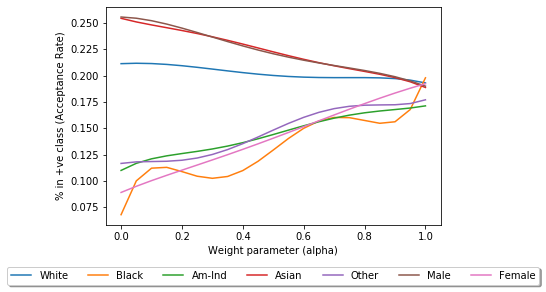

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.

y1=savgol_filter(a, 21, 5)
y2=savgol_filter(b, 21, 5)
y3=savgol_filter(c, 21, 5)
y4=savgol_filter(d, 21, 5)
y5=savgol_filter(e, 21, 5)
y6=savgol_filter(f, 21, 5)
y7=savgol_filter(g, 21, 5)


fig = plt.figure()
ax = plt.subplot(111)
ax.plot(Discrepancy,y1,label='White')   
ax.plot(Discrepancy,y2,label='Black')  
ax.plot(Discrepancy,y3,label='Am-Ind')  
ax.plot(Discrepancy,y4,label='Asian')  
ax.plot(Discrepancy,y5,label='Other')   
ax.plot(Discrepancy,y6,label='Male')  
ax.plot(Discrepancy,y7,label='Female') 



   
plt.title('')
ax.set_xlabel('Weight parameter (alpha)')
ax.set_ylabel('% in +ve class (Acceptance Rate)') 


ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 




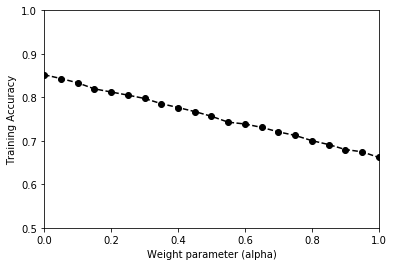

In [8]:
import matplotlib.pyplot as plt
import numpy as np
acc=[0.852, 0.8432857142857143, 0.8334285714285714, 0.8195714285714286, 0.8122857142857143, 0.8051428571428572, 0.7974285714285714, 0.7854285714285715, 0.7765714285714286, 0.7672857142857142, 0.7564285714285715, 0.7428571428571429, 0.7387142857142858, 0.7308571428571429, 0.7205714285714285, 0.7124285714285714, 0.7004285714285714, 0.6914285714285714, 0.68, 0.6747142857142857, 0.6617142857142857]
DI=np.arange(0,1.05,0.05)
plt.axis([0, 1, 0.5, 1])
plt.xlabel('Weight parameter (alpha)')
plt.ylabel('Training Accuracy')

plt.title('')
 
plt.plot(DI,acc,color='black', linestyle='dashed', marker='.',
     markerfacecolor='black', markersize=12)   

# plt.legend([""])
plt.show() 